1. เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน

Likelihood

(0.0, 1.0)

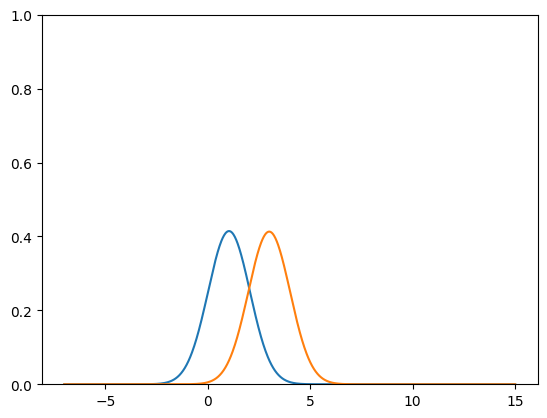

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(24)
x1 = np.random.normal(2,1,1000)
np.random.seed(25)
x2 = np.random.normal(6,1,1000)

x = np.linspace(-7,15,1000)

def likelihood (x,X_n):
    u = np.mean(X_n)
    std = (np.std(X_n)) ** 2

    fx = (np.exp(-((x-u)**2)/2*std))/(std * np.sqrt(2*np.pi))
    
    return fx


np.random.seed(1)
x1 = np.random.normal(1,1,1000)
np.random.seed(20)
x2 = np.random.normal(3,1,1000)
x = np.linspace(-7,15,1000)


fx1 = likelihood(x,x1)
fx2 = likelihood(x,x2)

yes = fx1/2
no = fx2/2

post_x1 = fx1 * yes/(fx1*yes+fx2*no)
post_x2 = fx2 * no/(fx1*yes+fx2*no)

plt.plot(x,fx1)
plt.plot(x,fx2)
plt.ylim([0,1])

Posterior probability

2. เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสไม่เท่ากัน

3. เขียนโปรแกรมสำหรับสร้างตัวจำแนกกำลังสอง

Spherical Covariance

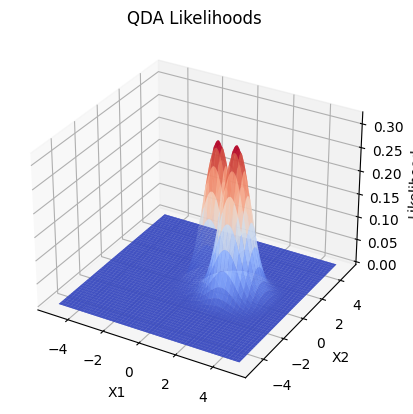

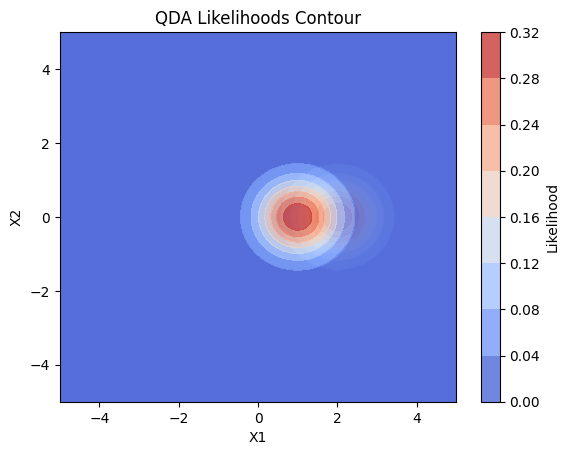

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.4, np.array([2, 0]), np.array([[0.5, 0], [0, 0.5]])),  
    (0.6, np.array([1, 0]), np.array([[0.5, 0], [0, 0.5]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()


Ellipsoid Covariance

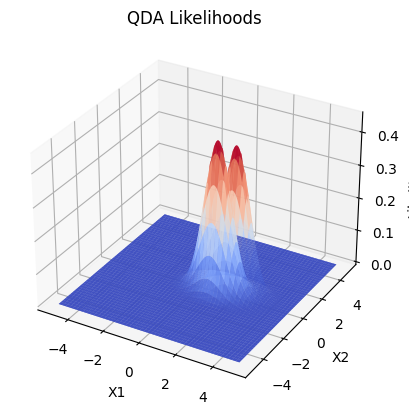

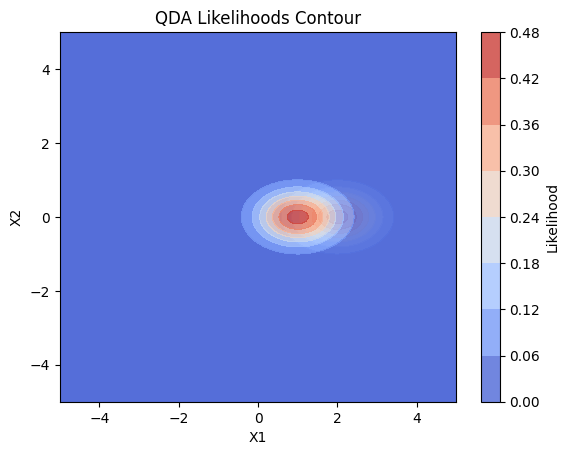

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.4, np.array([2, 0]), np.array([[0.5, 0], [0, 0.25]])),  
    (0.6, np.array([1, 0]), np.array([[0.5, 0], [0, 0.25]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()


4. เขียนโปรแกรมสำหรับสร้างตัวจำแนกเชิงเส้น
ทั้ง 4 ข้อให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ
- กำหนดค่าพารามิเตอร์ของการแจกแจก
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง

[-2.71975243601807, 1.96079619370818]


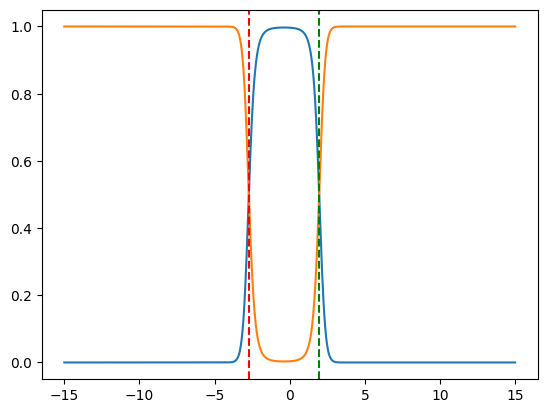

In [4]:
import numpy as np
from sympy import Symbol, solve
import matplotlib.pyplot as plt

def likelihood(x, data):
    std = np.std(data)
    u = np.mean(data)
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - u)**2 / (2 * std**2))

def decision_boundary(x1, x2):
    x = Symbol('x')
    u1 = np.mean(x1)
    std1 = np.std(x1)
    u2 = np.mean(x2)
    std2 = np.std(x2)

    result = solve((((x - u2)**2) / (2 * std2**2)) + (np.log(std2)) - (((x - u1)**2) / (2 * std1**2)) - (np.log(std1)), x)

    return result

x = np.linspace(-15, 15, 1000)
np.random.seed(10)
x1 = np.random.normal(1, 0.8, 1000)
np.random.seed(20)
x2 = np.random.normal(3, 1.2, 1000)

fx1 = likelihood(x, x1)
fx2 = likelihood(x, x2)
yes = fx1 / 2
no = fx2 / 2
post_x1 = fx1 * yes / (fx1 * yes + fx2 * no)
post_x2 = fx2 * no / (fx1 * yes + fx2 * no)

re = decision_boundary(x1, x2)
print(re)
plt.plot(x, post_x1)
plt.plot(x, post_x2)
plt.axvline(float(re[0]), color='r', linestyle='--')
plt.axvline(float(re[1]), color='g', linestyle='--')
plt.show()


Example

QDA

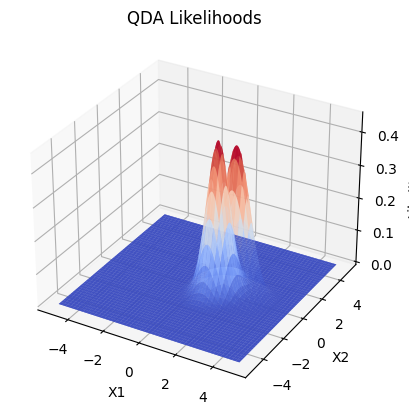

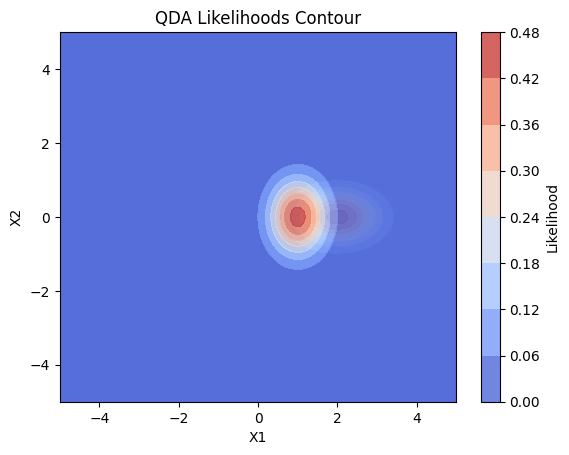

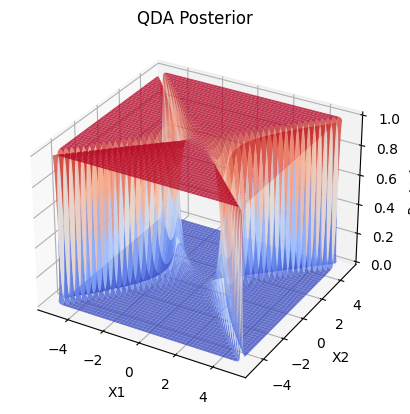

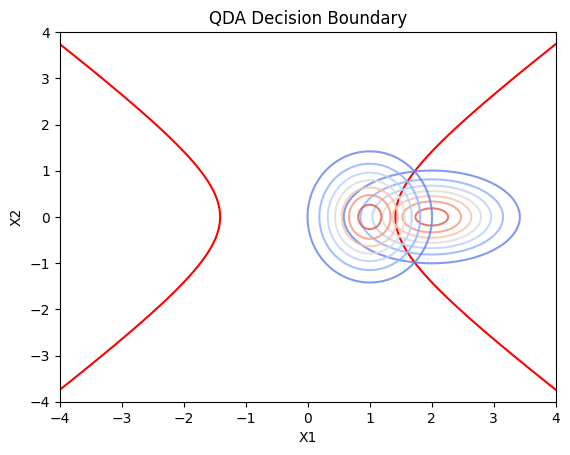

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.5, np.array([2, 0]), np.array([[0.5, 0], [0, 0.25]])),  
    (0.5, np.array([1, 0]), np.array([[0.25, 0], [0, 0.5]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('QDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

LDA

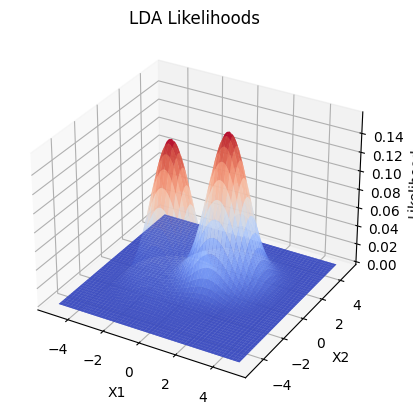

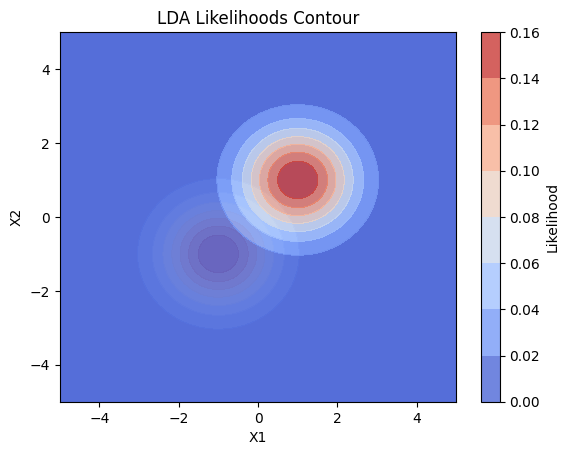

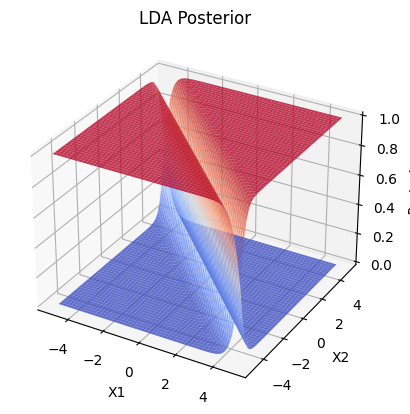

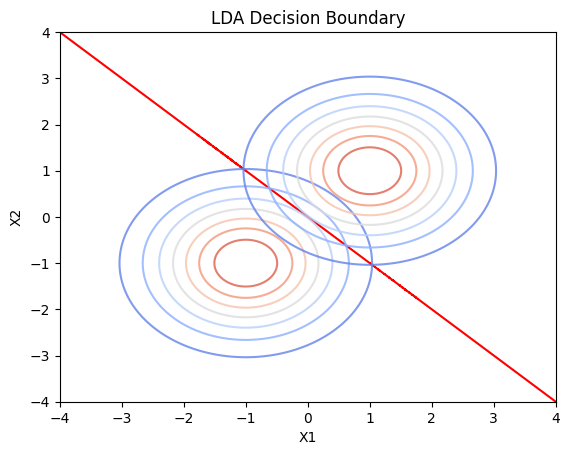

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.5, np.array([-1, -1]), np.array([[1, 0], [0, 1]])),  
    (0.5, np.array([1, 1]), np.array([[1, 0], [0, 1]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('LDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('LDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

Spherical Covariance

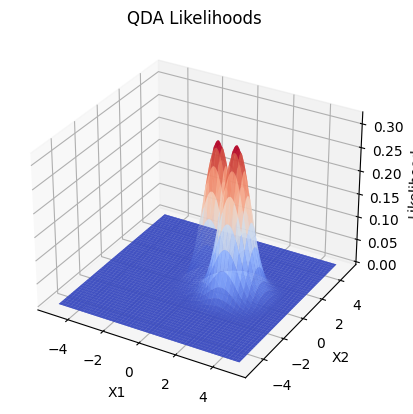

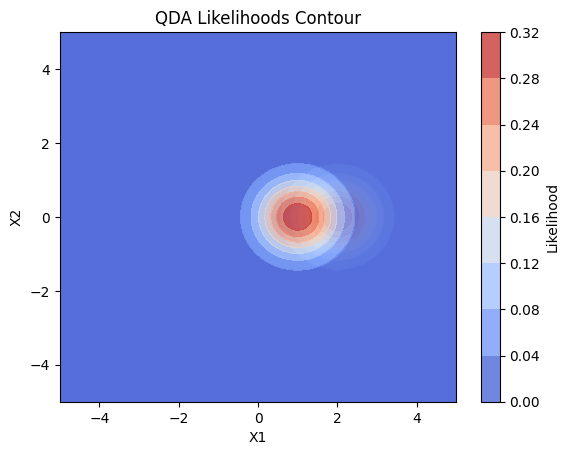

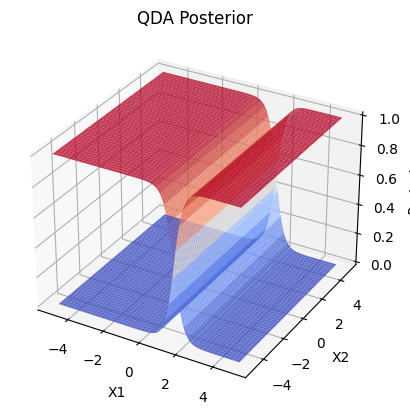

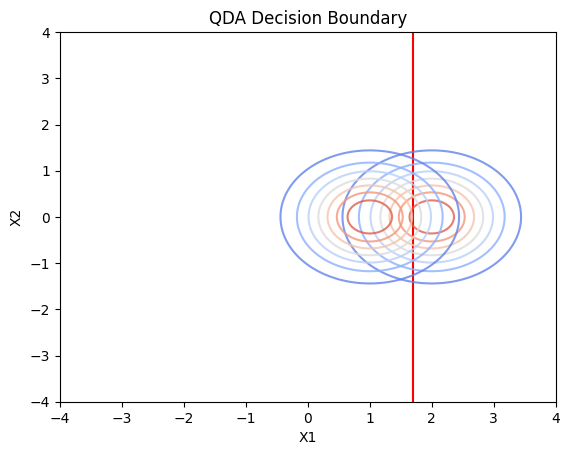

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.4, np.array([2, 0]), np.array([[0.5, 0], [0, 0.5]])),  
    (0.6, np.array([1, 0]), np.array([[0.5, 0], [0, 0.5]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('QDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

Ellipsoid Covariance

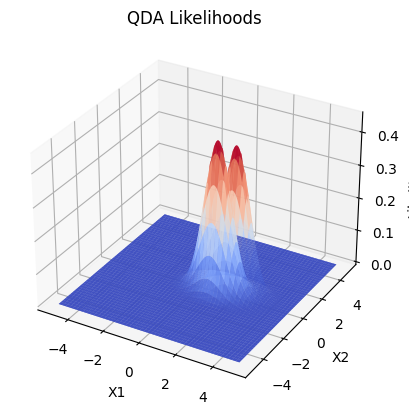

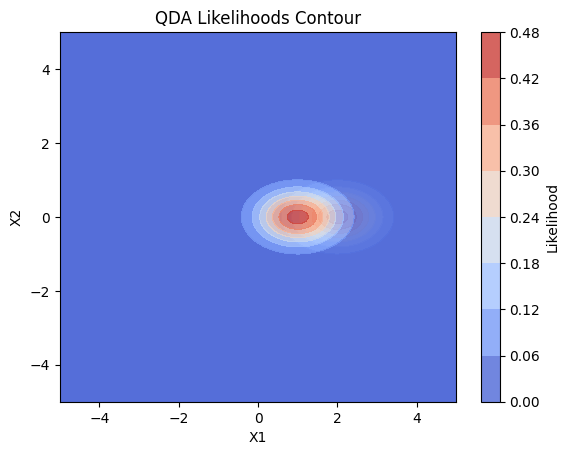

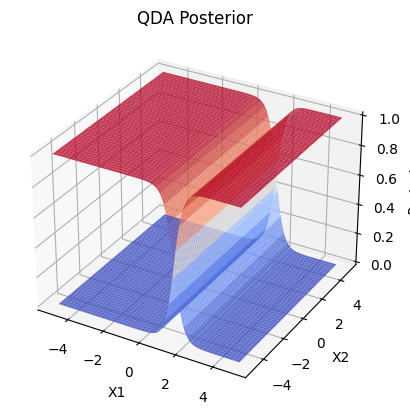

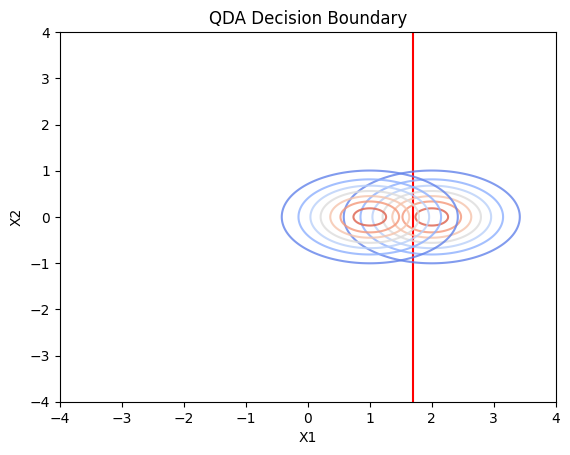

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

estimates = [
    (0.4, np.array([2, 0]), np.array([[0.5, 0], [0, 0.25]])),  
    (0.6, np.array([1, 0]), np.array([[0.5, 0], [0, 0.25]]))   
]

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('QDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

Generate Data

QDA

Estimates:
Class 1:
Prior Probability: 0.5
Mean: [2.09649292 0.02184047]
Covariance Matrix:
[[0.54794631 0.02052426]
 [0.02052426 0.2522055 ]]

Class 2:
Prior Probability: 0.5
Mean: [ 0.96620114 -0.00271554]
Covariance Matrix:
[[0.30856875 0.05858653]
 [0.05858653 0.47649273]]



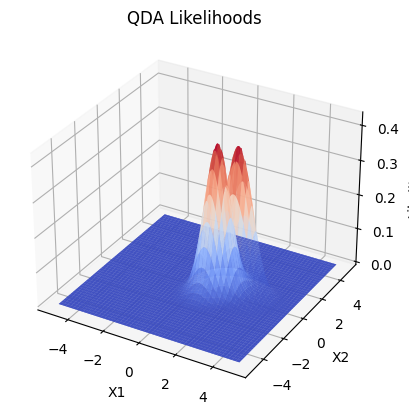

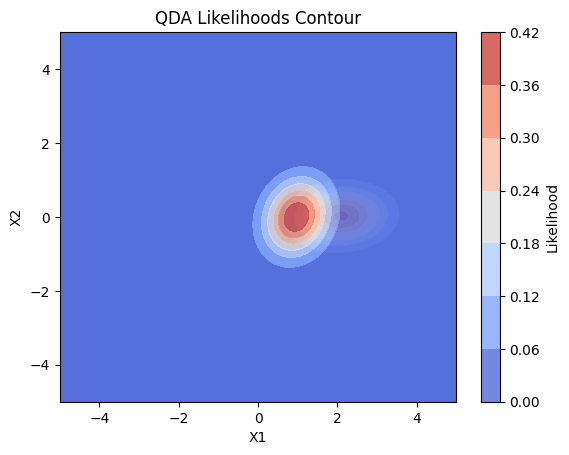

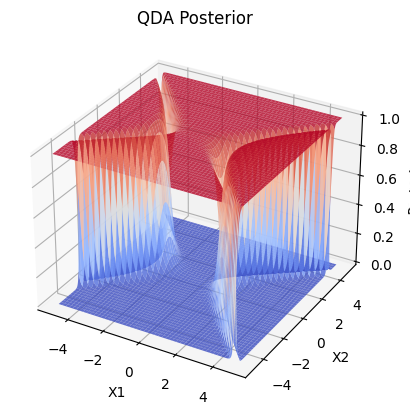

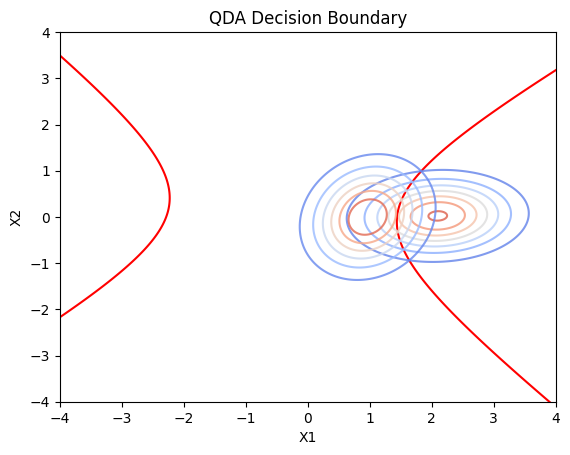

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# np.random.seed(0)

n_samples = 200  
class1_mean = np.array([2, 0])
class2_mean = np.array([1, 0])
class1_covariance = np.array([[0.5, 0], [0, 0.25]])
class2_covariance = np.array([[0.25, 0], [0, 0.5]])


class1_data = np.random.multivariate_normal(class1_mean, class1_covariance, n_samples)
class2_data = np.random.multivariate_normal(class2_mean, class2_covariance, n_samples)

prior_class1 = prior_class2 = 0.5

mean_class1 = np.mean(class1_data, axis=0)
covariance_class1 = np.cov(class1_data, rowvar=False)

mean_class2 = np.mean(class2_data, axis=0)
covariance_class2 = np.cov(class2_data, rowvar=False)

estimates = [
    (prior_class1, mean_class1, covariance_class1),
    (prior_class2, mean_class2, covariance_class2)
]

print("Estimates:")
for i, (prior, mean, covariance) in enumerate(estimates):
    print(f"Class {i + 1}:")
    print(f"Prior Probability: {prior}")
    print(f"Mean: {mean}")
    print(f"Covariance Matrix:\n{covariance}\n")


def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))


class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('QDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('QDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

LDA

Estimates:
Class 1:
Prior Probability: 0.5
Mean: [-1.07101721 -1.10645096]
Covariance Matrix:
[[ 0.99553644 -0.0019787 ]
 [-0.0019787   0.97145425]]

Class 2:
Prior Probability: 0.5
Mean: [0.95486105 0.90062758]
Covariance Matrix:
[[0.97155644 0.11627651]
 [0.11627651 1.05366892]]



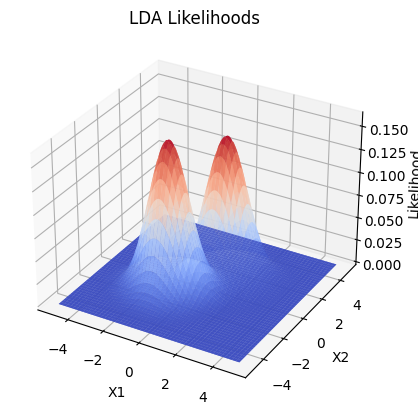

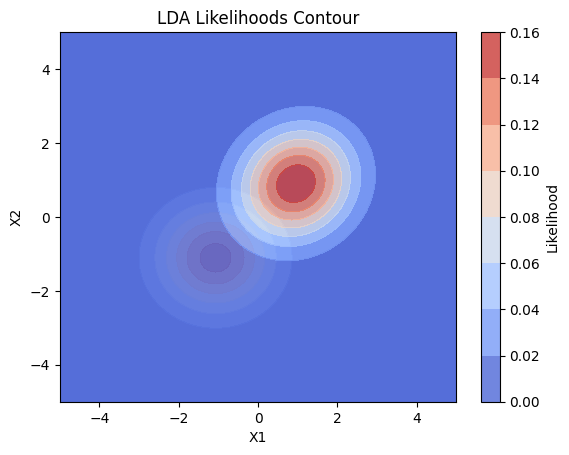

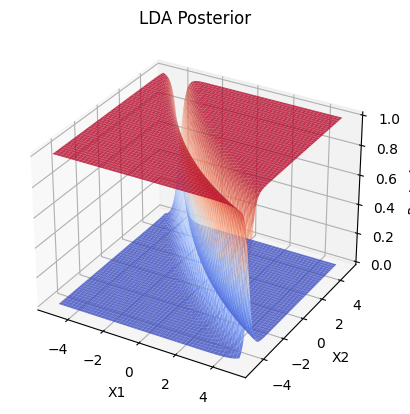

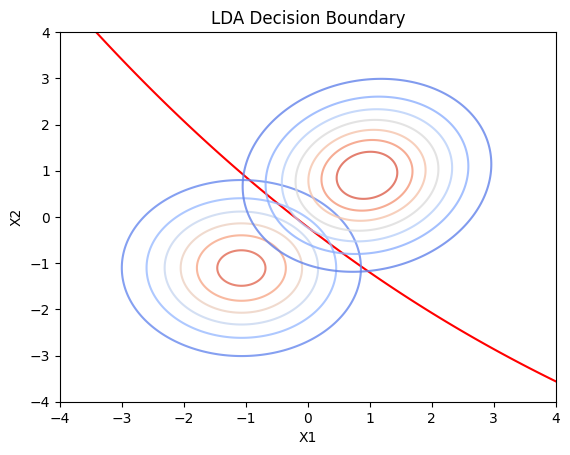

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# np.random.seed(0)

n_samples = 200 
class1_mean = np.array([-1, -1])
class2_mean = np.array([1, 1])
class1_covariance = np.array([[1, 0], [0, 1]])
class2_covariance = np.array([[1, 0], [0, 1]])

class1_data = np.random.multivariate_normal(class1_mean, class1_covariance, n_samples)
class2_data = np.random.multivariate_normal(class2_mean, class2_covariance, n_samples)

prior_class1 = prior_class2 = 0.5

mean_class1 = np.mean(class1_data, axis=0)
covariance_class1 = np.cov(class1_data, rowvar=False)

mean_class2 = np.mean(class2_data, axis=0)
covariance_class2 = np.cov(class2_data, rowvar=False)

estimates = [
    (prior_class1, mean_class1, covariance_class1),
    (prior_class2, mean_class2, covariance_class2)
]

print("Estimates:")
for i, (prior, mean, covariance) in enumerate(estimates):
    print(f"Class {i + 1}:")
    print(f"Prior Probability: {prior}")
    print(f"Mean: {mean}")
    print(f"Covariance Matrix:\n{covariance}\n")

def calculate_qda_probabilities(X, estimates):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    class_probabilities = np.zeros((n_samples, n_classes))

    for i, (prior, mean, covariance) in enumerate(estimates):
        class_probabilities[:, i] = multivariate_normal.pdf(X, mean=mean, cov=covariance)

    return class_probabilities

def dicriminant(X, estimates,p_r):
    n_samples = X.shape[0]
    n_classes = len(estimates)
    log_posterior = np.zeros((n_samples, n_classes))
    log_likelihood = np.log(p_r)

    for i, (prior, mean, covariance) in enumerate(estimates):
        log_prior = np.log(prior)
        multivariance = multivariate_normal.logpdf(X, mean=mean, cov=covariance)
        log_posterior[:, i] = multivariance + log_prior

    result = log_posterior
    return result

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.ravel(), X2.ravel()))

class_probabilities = calculate_qda_probabilities(X, estimates)
boundary_values = dicriminant(X, estimates, class_probabilities)
decision = boundary_values[:,0] - boundary_values[:,1]
yes = class_probabilities[:,0] / 2
no = class_probabilities[:,1] / 2
post_x1 = class_probabilities[:,0] * yes / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)
post_x2 = class_probabilities[:,1] * no / (class_probabilities[:,0] * yes + class_probabilities[:,1] * no)

class_probabilities1 = class_probabilities[:, 0].reshape(X1.shape)
class_probabilities2 = class_probabilities[:, 1].reshape(X1.shape)
decision = decision.reshape(X1.shape)
post_x1 = post_x1.reshape(X1.shape)
post_x2 = post_x2.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Likelihood')
ax.set_title('LDA Likelihoods')
plt.show()

plt.contourf(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contourf(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Likelihood')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Likelihoods Contour')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, post_x1, cmap='coolwarm', alpha=0.8)
ax.plot_surface(X1, X2, post_x2, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Posterior')
ax.set_title('LDA Posterior')
plt.show()


# Plot the decision boundary
plt.contour(X1, X2, decision, levels=[0], colors='r')
plt.contour(X1, X2, class_probabilities1, cmap='coolwarm', alpha=0.8)
plt.contour(X1, X2, class_probabilities2, cmap='coolwarm', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundary')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

5. เขียนโปรแกรมสำหรับ plot decision boundary เปรียบเทียบระหว่าง LDA, QDA และ Logistic regression โดยอาจจะมีการเพิ่มพจน์ second order polynomial โดยอาจจะใช้การสุ่มข้อมูลในรูปแบบต่างๆ